In [57]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [58]:
#Load the dataset
data=pd.read_csv('netflix_titles.csv')
data.shape

(8807, 12)

In [59]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [60]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
#Checking for null values
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
#Cleaning the data
data = data.dropna()

In [63]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,False,False,False,False,False,False,False,False,False,False,False,False
8802,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


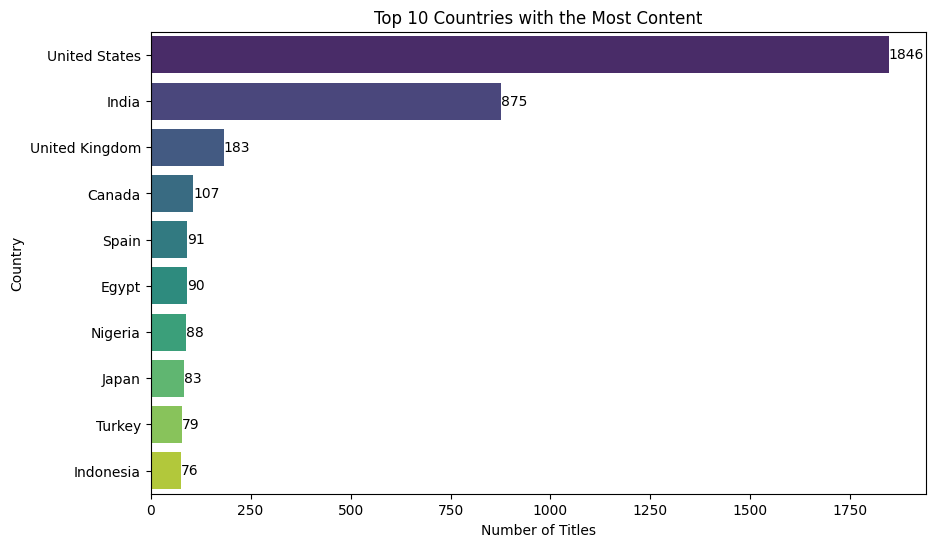

In [64]:
#Visualizing the top 10 countries with most content on Netflix
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

for i, count in enumerate(top_countries.values):
    bars.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()

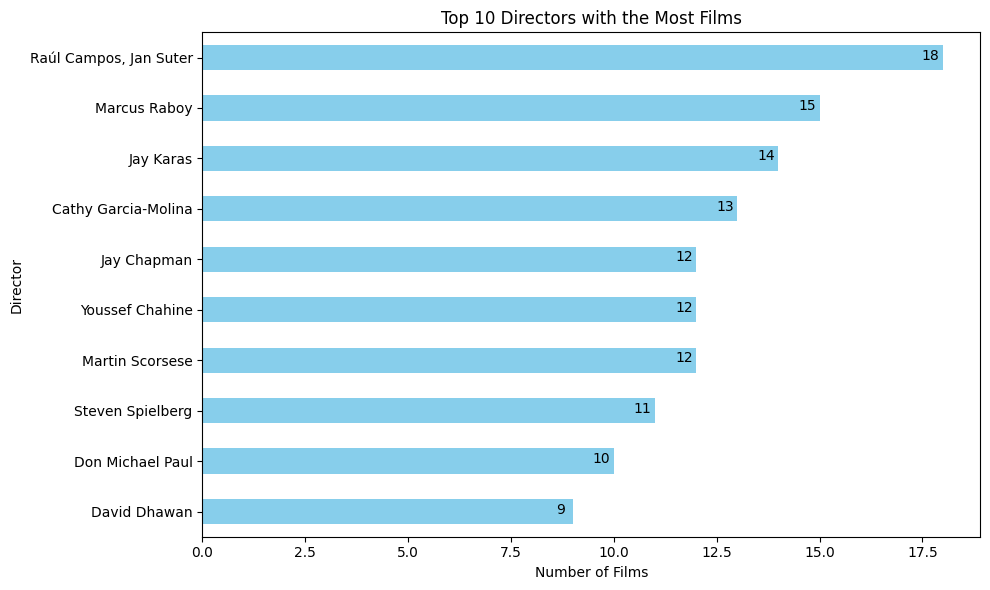

In [65]:
#Top 10 directors with most Films
director_counts = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = director_counts.sort_values().plot(kind='barh', color='skyblue')

for bar in bars.patches:
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2 - 0.1, f'{int(bar.get_width())}', 
             ha='center', va='bottom', color='black')

plt.title('Top 10 Directors with the Most Films')
plt.xlabel('Number of Films')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

In [66]:
#Distribution of Content Ratings
z = data.groupby(['rating']).size().reset_index(name='counts')
piechart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings',
                  color_discrete_sequence=px.colors.qualitative.Set2)
piechart.show()

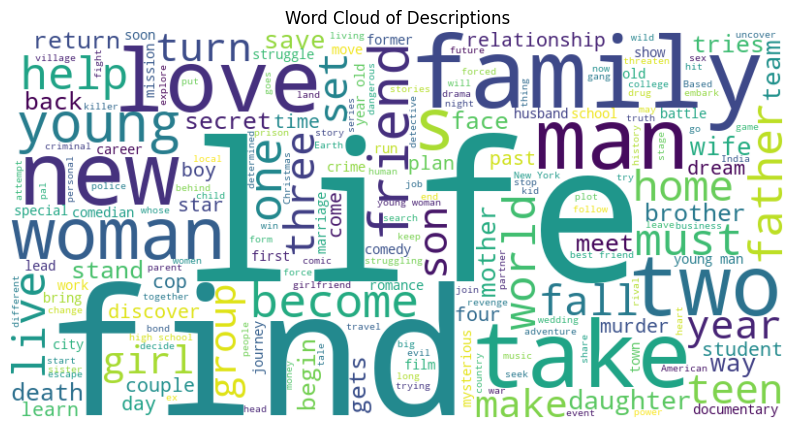

In [67]:
# Text Analysis - Word cloud of descriptions
text = ' '.join(data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions')
plt.axis('off')
plt.show()

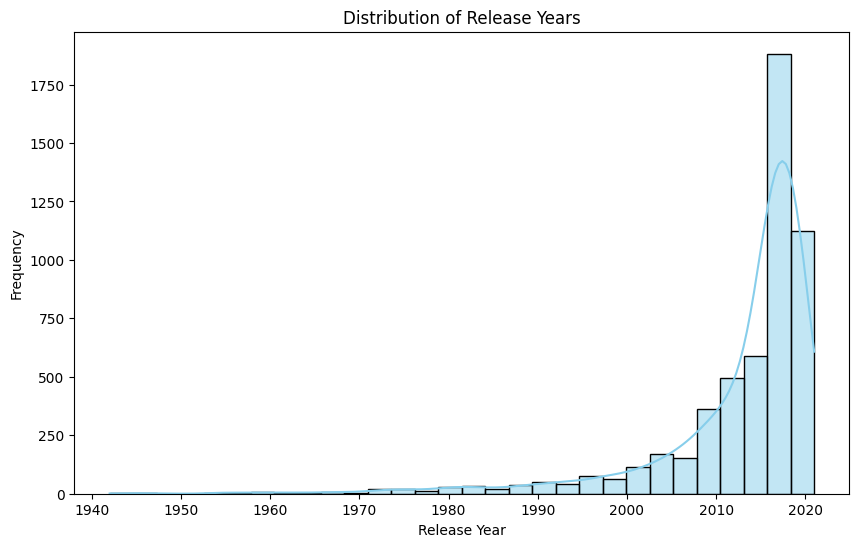

In [68]:
# User Engagement Analysis - Histogram of release years
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()